# Лабораторная работа 0
# Получение и обработка данных
### _Студент: Мамчур А. В._
### _Группа: М80-304Б._

## _Постановка задачи_
Требуется сформировать/получить два набора данных соответствующие следующим критериям:
1. Один из датасетов должен представлять собой корпус документов. Язык, источник и
тематика произвольна
2. Второй датасет должен содержать категориальные, количественные признаки. Для
данного датасета определить предсказываемые признаки (для задачи регрессии и
классфикации). Если такого признака нет, спроектировать.<br>

По каждому датасету построить распределения признаков (в случае корпуса документов –
построить распределение слов) и объяснить имеющуюся картину. Вычислить статистические
характеристики признаков. Обнаружить и решить возможные проблемы с данными. Если решить
данную проблему невозможно, объяснить почему.

## _Требования_
1. Датасеты должны быть уникальны.
2. Исходный код должен быть написан в одном код стайле.
3. Должен быть указан источник данных.

__Оборудование:__ Ноутбук Asus X554L Intel Core i3-5005U 2000 МГц, память 4 ГБ, 64-разрядная ос.<br>
__Программное обеспечение:__ Windows 10, jupyter notebook.<br>
### _Датасет1_
#### _Мельбурнский рынок жилья_
Содержит категориальные, количественные признаки.<br>

Ссылка: https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv

_Описание колонок_<br>

__Suburb__: Пригород

__Address__: Адрес

__Rooms__: Количество комнат

__Price__: Цена в австралийских долларах

__Method__: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

__Type__: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

__SellerG:__ Агент по недвижимости

__Date:__ Дата продажи

__Distance:__ Расстояние от центра в километрах

__Regionname:__ Название региона (West, North West, North, North east ...etc)

__Propertycount:__ Количество свойств, существующих в пригороде.

__Bedroom2:__ Количество спален

__Bathroom:__Количество ванных комнат

__Car:__ Количество машин

__Landsize:__ Размер земли в метрах

__BuildingArea:__ Площадь застройки в метрах

__YearBuilt:__ Год постройки

__CouncilArea__: Управляющий совет по области

__Lattitude:__ Широта

__Longtitude:__ Долгота

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('Melbourne_housing_FULL.csv')
dataset.head() #вывод первых пяти строк датасета

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
dataset.tail()#вывод последних пяти строк датасета

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [9]:
dataset.shape#размеры таблицы

(34857, 21)

In [10]:
dataset.info()#краткая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [11]:
dataset.columns #массив названий столбцов

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
categorical_columns = [c for c in dataset.columns if dataset[c].dtype.name == 'object']
numerical_columns   = [c for c in dataset.columns if dataset[c].dtype.name != 'object']
print(categorical_columns)#масиив колонок с категориальными данными
print(numerical_columns)#массив колонок с количественными данными

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [7]:
dataset.count(axis=0)#количество заполненных (непропущенных) элементов, 
#араметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), 
#т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

Заметим, что данные содержат пропущенные значения, то имеется две простые альтернативы:
1. Удалить столбцы с такими значениями
2. Удалить строки с такими значениями<br>
После этого, к сожалению, данных может стать совсем мало, поэтому рассмотрим другие альтернативные способы.<br>

С помощью метода _describe()_ получим некоторую сводную информацию по всей таблице. По умолчанию будет выдана информация только для количественных признаков. Это общее их количество (count), среднее значение (mean), стандартное отклонение (std), минимальное (min), макcимальное (max) значения, медиана (50%) и значения нижнего (25%) и верхнего (75%) квартилей:

In [12]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Также мы можем получить некоторую информацию для категориальных признаков.<br>
В таблице для каждого категориального признака приведено общее число заполненных ячеек (count), количество значений, которые принимает данный признак (unique), самое популярное (часто встречающееся) значение этого признака (top) и количество объектов, в которых встречается самое частое значение данного признака (freq).

In [13]:
dataset[categorical_columns].describe()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


Заполнить пропущенные категориальные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

In [14]:
dataset = dataset.fillna(dataset.median(axis=0), axis=0)#заменяем пропуски в количественных признаках на медианные
dataset.count(axis=0)

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            34857
Method           34857
SellerG          34857
Date             34857
Distance         34857
Postcode         34857
Bedroom2         34857
Bathroom         34857
Car              34857
Landsize         34857
BuildingArea     34857
YearBuilt        34857
CouncilArea      34854
Lattitude        34857
Longtitude       34857
Regionname       34854
Propertycount    34857
dtype: int64

Теперь рассмотрим пропущенные значения в столбцах, соответствующих категориальным признакам.<br>
Простая стратегия – заполнение пропущенных значений самым популярным в столбце.

In [15]:
dataset['CouncilArea'].describe()#для столбца Управляющий совет по области

count                       34854
unique                         33
top       Boroondara City Council
freq                         3675
Name: CouncilArea, dtype: object

В столбце CouncilArea имеются пропущенные значения. Наиболее частым (встречается 3675 раз) является Boroondara City Council.<br> Заполняем все пропуски этим значением:

In [16]:
dataset['CouncilArea'] = dataset['CouncilArea'].fillna('Boroondara City Council')
dataset.count(axis=0)

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            34857
Method           34857
SellerG          34857
Date             34857
Distance         34857
Postcode         34857
Bedroom2         34857
Bathroom         34857
Car              34857
Landsize         34857
BuildingArea     34857
YearBuilt        34857
CouncilArea      34857
Lattitude        34857
Longtitude       34857
Regionname       34854
Propertycount    34857
dtype: int64

Тоже самое проделаем для Regionname

In [17]:
dataset['Regionname'].describe()

count                     34854
unique                        8
top       Southern Metropolitan
freq                      11836
Name: Regionname, dtype: object

In [18]:
dataset['Regionname'] = dataset['Regionname'].fillna('Southern Metropolitan')
dataset.count(axis=0)

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            34857
Method           34857
SellerG          34857
Date             34857
Distance         34857
Postcode         34857
Bedroom2         34857
Bathroom         34857
Car              34857
Landsize         34857
BuildingArea     34857
YearBuilt        34857
CouncilArea      34857
Lattitude        34857
Longtitude       34857
Regionname       34857
Propertycount    34857
dtype: int64

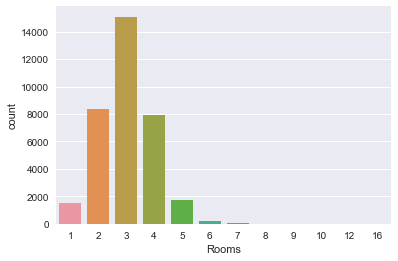

In [19]:
sns.countplot(x='Rooms', data=dataset)#показывает распределение числа комнат
plt.show()

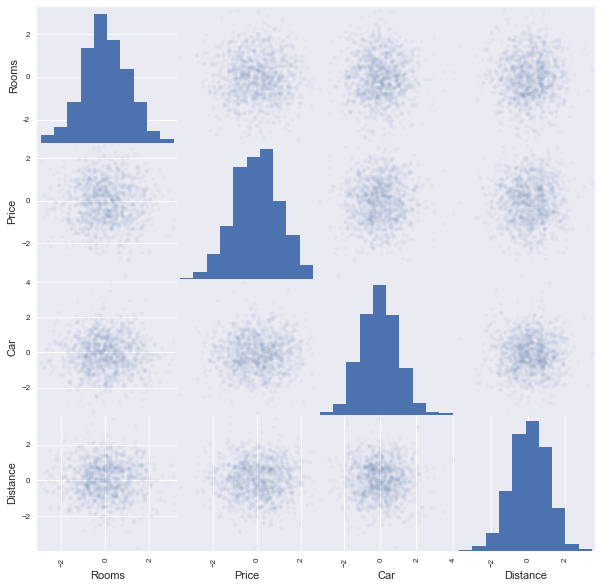

In [21]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['Rooms', 'Price', 'Car', 'Distance'])#генерирует DataFrame df, 
#который состоит из четырех столбцов с нормально распределенными случайными значениями и именами столбцов

scatter_matrix(df, alpha=0.05, figsize=(10, 10))#рисует матрицу точечных графиков.
plt.show()


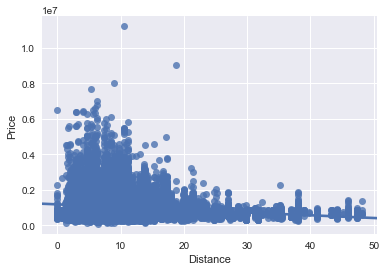

In [35]:
sns.regplot(x='Distance', y='Price', data=dataset)#выводим зависимость цены от расстояния от центра. 
                                                    #Заментно, что цена выше, чем ближе к центру

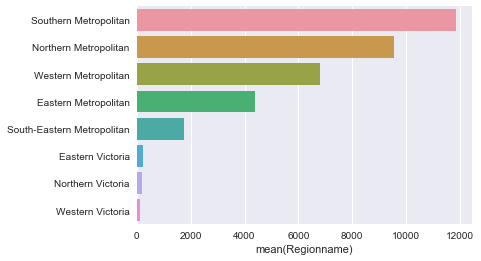

In [22]:
data = dataset.Regionname.value_counts()#какой регион пользуется популярностью
sns.barplot(y = data.index, x = data, orient='h')

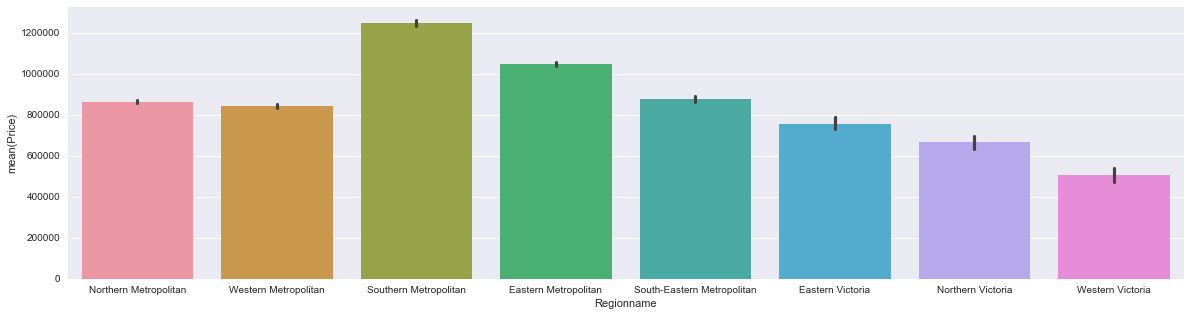

In [23]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,1,1)
sns.barplot(data = dataset, x = 'Regionname', y = 'Price')##зависимость цены от региона

### _Датасет2_
#### _Набор данных полярности настроения_
Представляет собой корпус документов, содержащий 1000 положительных и 1000 отрицательных обзоров на фильмы.<br>
Ссылка: https://www.kaggle.com/anindya2906/movie-review-polarity

Рассмотрим 1000 негативных отзывов:

In [24]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist as FreqDist
corpus_root = r'review_polarity\txt_sentoken\neg'
corp = PlaintextCorpusReader(corpus_root, '.*txt')#все файлы, заканчивающиеся на txt

corp.fileids()[:10]#имена первых 10 файлов корпуса


['cv000_29416.txt',
 'cv001_19502.txt',
 'cv002_17424.txt',
 'cv003_12683.txt',
 'cv004_12641.txt',
 'cv005_29357.txt',
 'cv006_17022.txt',
 'cv007_4992.txt',
 'cv008_29326.txt',
 'cv009_29417.txt']

In [26]:
print(corp.words()[:50])#печать первых 50 слов

['Plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch']


In [27]:
for f in corp.fileids()[:10]:#сколько слов в каждом документе(первые 10)
    print(len(corp.words(f)), f)

879 cv000_29416.txt
304 cv001_19502.txt
581 cv002_17424.txt
629 cv003_12683.txt
901 cv004_12641.txt
759 cv005_29357.txt
687 cv006_17022.txt
748 cv007_4992.txt
854 cv008_29326.txt
1025 cv009_29417.txt


In [28]:
print(len(corp.words()))#сколько слов всего 

6003664


In [29]:
corp_fr = nltk.FreqDist(corp.words())
corp_fr.most_common(10)#выводим топ 10 слов

[(',', 282124),
 ('the', 280450),
 ('.', 257296),
 ('a', 143280),
 ('and', 125419),
 ('of', 123889),
 ('to', 123353),
 ("'", 122529),
 ('is', 89081),
 ('in', 80762)]

Проблема: данные содержат знаки препинания, числа, а также заглавные буквы.

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))#множество стоп слов(артикли, предлоги и тд)

allWords = corp.words()#множество всех слов
newword = []#массив для обработанного датасета
for w in allWords:
    w=w.lower()#понижаем регистр
    if not w in stop_words and w.isalpha():#убираем стоп слова и числа 
        newword.append(w)

print(newword[:10])#вывод перых десяти слов

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get']


In [32]:
corp_fr = nltk.FreqDist(newword)
corp_fr.most_common(10)#выводим топ 10 слов обработанного датасета

[('film', 34296),
 ('movie', 25961),
 ('one', 22400),
 ('like', 15104),
 ('even', 11088),
 ('time', 9344),
 ('good', 9290),
 ('would', 8720),
 ('get', 8416),
 ('bad', 8272)]

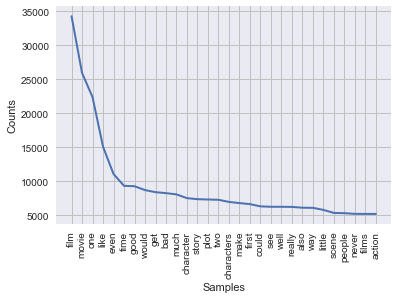

In [34]:
corp_fr.plot(30,cumulative=False)#графичек топ 10 слов

Как и ожидалось слова "film" и "movie" лидируют по частоте в обзорах фильмов.

### Вывод
В ходе данной лабораторной работы я познакомилась с командной оболочкой для интерактивных вычислений Jupyter notebook, позволяющая обрабатывать данные, заниматься статистическим моделированием и машинным обучением. С помощью простейших команд мне удалось немного проанализировать исходные датасеты, выявить и виазулизировать некоторые зависимости.